## Data Preprocessing

In [96]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
import pickle

In [97]:
data = pd.read_csv('diabetes.csv')

In [98]:
# data = pd.read_csv('data.csv')


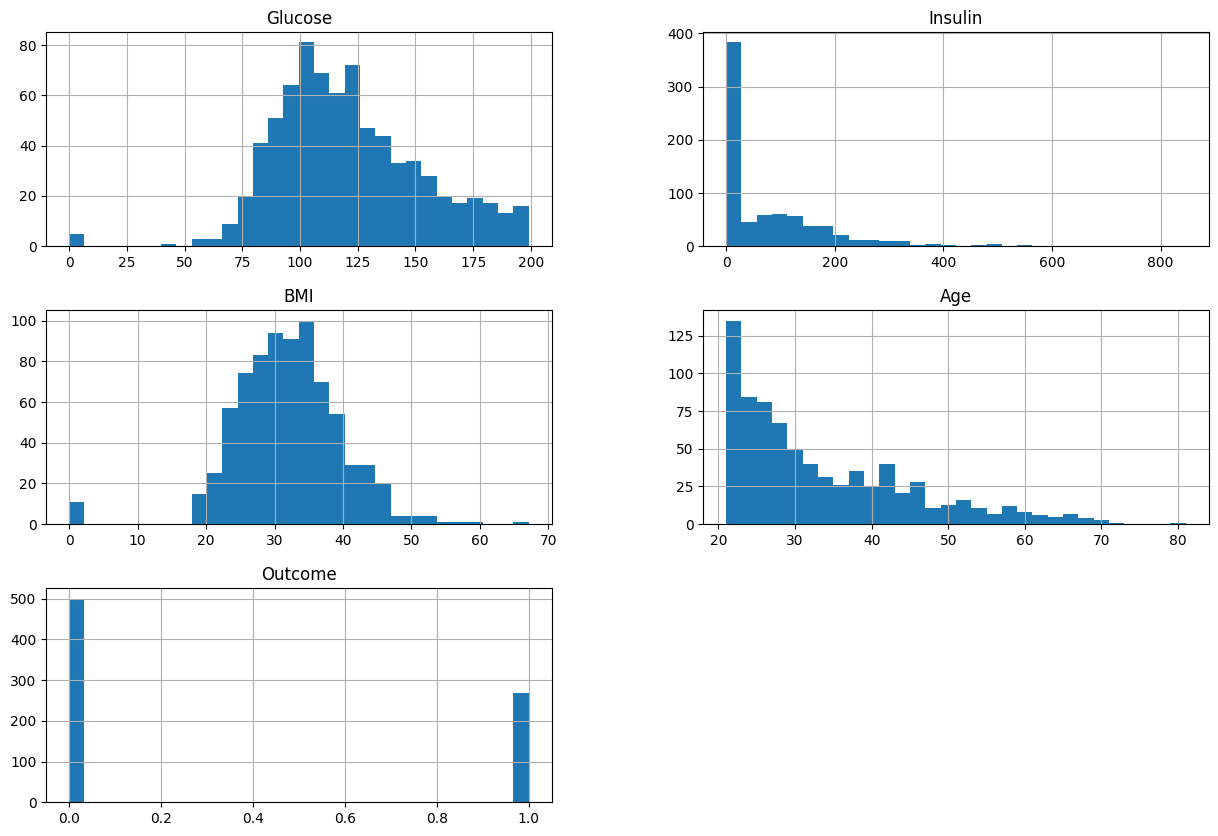

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizing the distribution of features
data.hist(bins=30, figsize=(15, 10))
plt.show()

## Gaussian Naive Bayes Model


In [100]:
X = data[['Age', 'Glucose', 'Insulin', 'BMI']]
y = data['Outcome']  # Ensure this is the correct target column

# Split and scale data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train models
nb_model = GaussianNB().fit(X_train, y_train)

y_pred_GaussianNB = nb_model.predict(X_test)

## Custom Perceptron

In [103]:
import numpy as np
import pickle

class CustomPerceptron:
    def __init__(self, learning_rate=0.1, n_iters=10000):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        np.random.seed(63)
        self.weights = np.random.rand(n_features)
        self.bias = np.random.rand()

        y_ = np.where(y <= 0, -1, 1)

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = np.sign(linear_output)
                if y_predicted == 0:
                    y_predicted = -1

                if y_predicted != y_[idx]:
                    self.weights += self.learning_rate * y_[idx] * x_i
                    self.bias += self.learning_rate * y_[idx]

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.sign(linear_output)

# Example Usage
if __name__ == "__main__":
    perceptron = CustomPerceptron(learning_rate=0.1, n_iters=10000)
    perceptron.fit(X_train, y_train)

    y_pred_perceptron = perceptron.predict(X_test)
    y_pred_perceptron = np.where(y_pred_perceptron == -1, 0, 1)




## Evaluation

In [104]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print(f"Results for Gaussian NB:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_GaussianNB):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_GaussianNB, average='weighted'):.2f}")
print(f"Recall: {recall_score(y_test,y_pred_GaussianNB, average='weighted'):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred_GaussianNB, average='weighted'):.2f}\n")

# y_test_perceptron = np.where(y_test <= 0, -1, 1)
print(f"Results for Custom Perceptron:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_perceptron):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_perceptron, average='weighted'):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_perceptron, average='weighted'):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred_perceptron, average='weighted'):.2f}\n")

Results for Gaussian NB:
Accuracy: 0.75
Precision: 0.75
Recall: 0.75
F1-Score: 0.75

Results for Custom Perceptron:
Accuracy: 0.78
Precision: 0.78
Recall: 0.78
F1-Score: 0.77



Gaussian NB and Perceptron shows similar accuracy, Precision, Recall and F1-Score on given dataset, while Custom Perceptron being slightly more effective on given dataset.

## Saving the model

In [105]:
# Save models and scaler
pickle.dump(nb_model, open('naive_bayes_model.pkl', 'wb'))
pickle.dump(perceptron, open('perceptron_model.pkl', 'wb'))
pickle.dump(scaler, open('MinMaxScaler.pkl', 'wb'))

## K-fold Cross Validation

In [106]:
from random import shuffle

In [107]:
# Assume the target column is named 'Outcome' and features are as described
X = data[['Age', 'Glucose', 'Insulin', 'BMI']].values
y = data['Outcome'].values

In [108]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [109]:
from sklearn.model_selection import cross_val_score
import numpy as np

def evaluate_model_kfold(model, X, y, k=5):
    scoring_metrics = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']
    results = {}

    for metric in scoring_metrics:
        scores = cross_val_score(model, X, y, cv=k, scoring=metric)
        results[metric] ={ 'Mean': np.mean(scores) }
            # 'Std': np.std(scores)

    return results

# Perform 5-Fold Cross-Validation
print("Naive Bayes (5-Fold CV) Performance:")
nb_results = evaluate_model_kfold(nb_model, X, y, k=5)
print(nb_results)

# print("\nPerceptron (5-Fold CV) Performance:")    
# perc_results = evaluate_model_kfold(perceptron_model, X, y, k=5)
# print(perc_results)

Naive Bayes (5-Fold CV) Performance:
{'accuracy': {'Mean': np.float64(0.7552754435107376)}, 'precision_weighted': {'Mean': np.float64(0.7487598435842338)}, 'recall_weighted': {'Mean': np.float64(0.7552754435107376)}, 'f1_weighted': {'Mean': np.float64(0.7470324626067927)}}


In [110]:
def calculate_metrics(y_true, y_pred):
    true_positive = np.sum((y_true == 1) & (y_pred == 1))
    false_positive = np.sum((y_true == 0) & (y_pred == 1))
    false_negative = np.sum((y_true == 1) & (y_pred == 0))

    accuracy = np.mean(y_pred == y_true)
    precision = true_positive / (true_positive + false_positive) if true_positive + false_positive > 0 else 0
    recall = true_positive / (true_positive + false_negative) if true_positive + false_negative > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if precision + recall > 0 else 0

    return accuracy, precision, recall, f1

In [111]:
def k_fold_cross_validation(X, y, model, k=5):
    fold_size = len(y) // k
    indices = np.arange(len(y))
    np.random.shuffle(indices)
    X_shuffled = X[indices]
    y_shuffled = y[indices]

    scores = []

    for fold in range(k):
        start = fold * fold_size
        end = start + fold_size if fold != k - 1 else len(y)

        # Split into training and validation sets
        X_val = X_shuffled[start:end]
        y_val = y_shuffled[start:end]
        X_train = np.concatenate((X_shuffled[:start], X_shuffled[end:]))
        y_train = np.concatenate((y_shuffled[:start], y_shuffled[end:]))

        # Validate the model
        predictions = model.predict(X_val)
        predictions = np.where(predictions == -1, 0, 1)
        metrics = calculate_metrics(y_val, predictions)
        #accuracy = np.mean(predictions == y_val)
        scores.append(metrics)

    return np.array(scores)

perceptron_predictions = k_fold_cross_validation(X, y, perceptron, k=5)
print(f"Perceptron Metrics:")
print(f"Accuracy     Precision   Recall    F-1 Score")
print(perceptron_predictions)



Perceptron Metrics:
Accuracy     Precision   Recall    F-1 Score
[[0.77124183 0.78571429 0.55932203 0.65346535]
 [0.79084967 0.77142857 0.52941176 0.62790698]
 [0.77124183 0.76470588 0.49056604 0.59770115]
 [0.75163399 0.675      0.51923077 0.58695652]
 [0.75       0.71875    0.43396226 0.54117647]]


In [112]:
#Add confusion matrix whereever possible

In [113]:
column_averages = np.mean(perceptron_predictions, axis=0)

print(f"Average Result for k-cross validation on Perceptron:")
print(f"Accuracy: {column_averages[0]:.2f}")
print(f"Precision: {column_averages[1]:.2f}")
print(f"Recall: {column_averages[2]:.2f}")
print(f"F1-Score: {column_averages[3]:.2f}\n")


Average Result for k-cross validation on Perceptron:
Accuracy: 0.77
Precision: 0.74
Recall: 0.51
F1-Score: 0.60

